# Charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

*This notebook is intended for generating quick visualizations from the emissions data*

In [2]:
sectors = pd.read_csv('data/sectors.csv')

In [3]:
sectors['SECTOR'] = sectors['SECTOR'].replace(to_replace={
    'Food & Agriculture' : 'Food'
})

In [4]:
sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 2 (market-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,GROWTH RATE,COMPANY SIZE,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,2059760,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,True,NaN,NaN,Food,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,1761444,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,True,-4.19,NaN,Food,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,1633815,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,True,-10.41,NaN,Food,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,1456823,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,True,15.83,NaN,Food,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,826257,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,True,6.41,NaN,Food,57786.0,84.33


---

### Averages Charts

In [5]:
avg_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='TOTAL EMISSIONS',
    aggfunc=np.mean
).reset_index().drop(index=0)

In [6]:
for col in avg_BySector.columns[1:]:
    avg_BySector[col] = (avg_BySector[col] / 100000).round(2)

In [7]:
scope1_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 1',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope1_BySector.columns[1:]:
    scope1_BySector[col] = (scope1_BySector[col] / 100000).round(2)

scope2_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 2 (location-based)',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope2_BySector.columns[1:]:
    scope2_BySector[col] = (scope2_BySector[col] / 100000).round(2)

scope3_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 3',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope3_BySector.columns[1:]:
    scope3_BySector[col] = (scope3_BySector[col] / 100000).round(2)

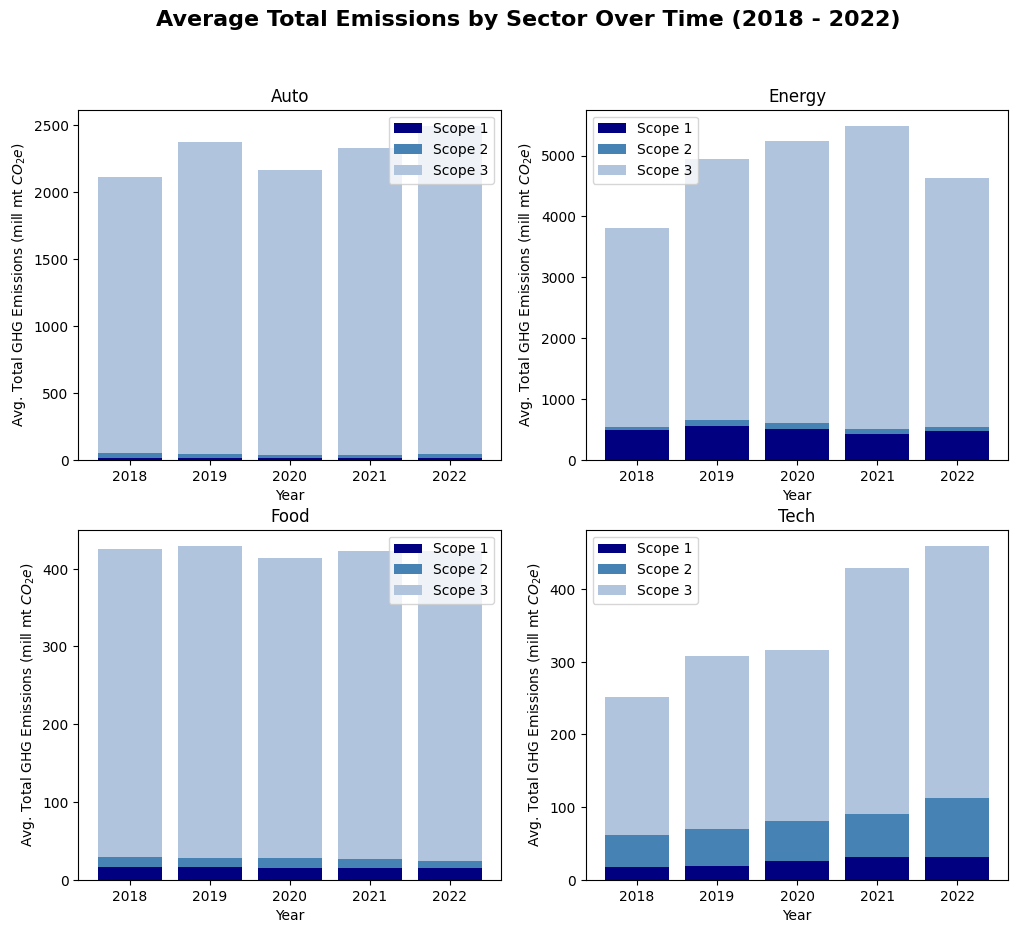

In [8]:
n=1
plt.figure(figsize=[12,10])
for col in avg_BySector.columns[1:]:
    plt.subplot(2,2,n)
    plt.bar(scope1_BySector['YEAR'], height=scope1_BySector[col], color='navy', label='Scope 1')
    plt.bar(scope2_BySector['YEAR'], height=scope2_BySector[col], bottom=scope1_BySector[col], color='steelblue', label='Scope 2')
    plt.bar(scope3_BySector['YEAR'], height=scope3_BySector[col], bottom=scope1_BySector[col]+scope2_BySector[col], color='lightsteelblue', label='Scope 3')


    plt.xlabel('Year')
    plt.ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    plt.title(col)
    plt.ylim(0, )
    plt.legend()
    n+=1
plt.suptitle('Average Total Emissions by Sector Over Time (2018 - 2022)', fontsize=16, fontweight='bold')
plt.show();

In [9]:
auto = sectors[(sectors['SECTOR']=='Auto') & (sectors['YEAR']!=2017) & (sectors['COMPANY NAME']!='Hyundai')& (sectors['COMPANY NAME']!='Toyota')]

In [10]:
def ci_OverTime(sector):

    companies = sectors.loc[sectors['SECTOR']==sector, 'COMPANY NAME'].unique()
    years = ['2018','2019', '2020', '2021', '2022']

    for co in companies:
        ci = sectors[sectors['COMPANY NAME'] == co]["Adjusted CI"]
        plt.plot(years, ci, label = co, marker='o', markersize=5)
    plt.legend(loc = 'upper right', fontsize = 'xx-small')
    plt.xlabel('Year')
    plt.ylabel('Carbon Intensity (mt $CO_{2}e$ / mill USD)')
    plt.title(sector +  ' Carbon Intensity Over Time (2018-2022)');

In [11]:
auto['YEAR'].unique()
auto[auto['COMPANY NAME'] == 'Tesla']["Adjusted CI"]

165      NaN
166      NaN
167      NaN
168    10.92
169     7.49
Name: Adjusted CI, dtype: float64

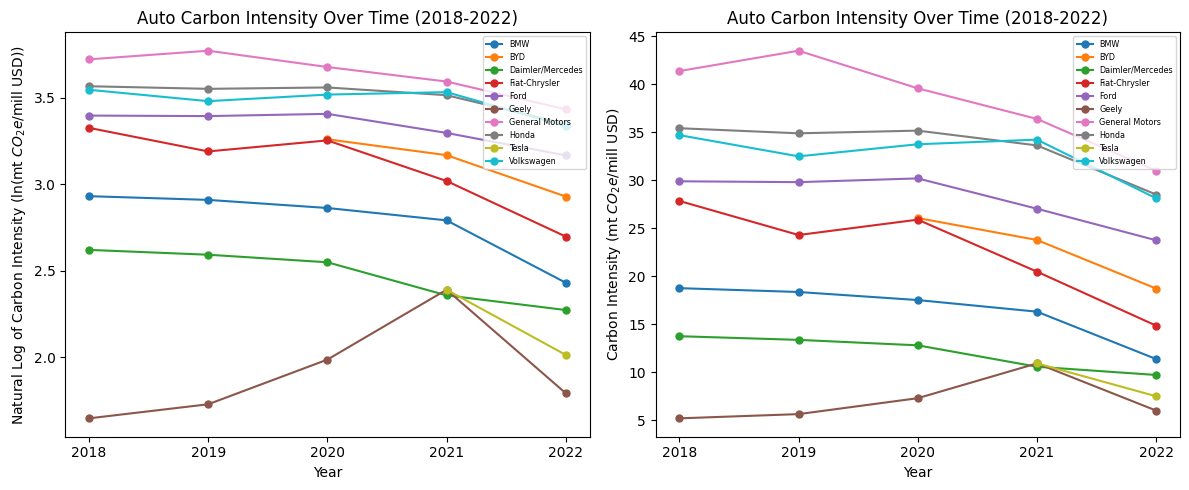

In [12]:
companies = auto.loc[:,'COMPANY NAME'].unique()
years = ['2018','2019', '2020', '2021', '2022']
plt.figure(figsize=[12,5])
plt.subplot(121)
for co in companies:
    ci = np.log(auto[auto['COMPANY NAME'] == co]["Adjusted CI"])
    plt.plot(years, ci, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Natural Log of Carbon Intensity (ln(mt $CO_{2}e$/mill USD))')
plt.title('Auto' +  ' Carbon Intensity Over Time (2018-2022)');

plt.subplot(122)

for co in companies:
    ci = auto[auto['COMPANY NAME'] == co]["Adjusted CI"]
    plt.plot(years, ci, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (mt $CO_{2}e$/mill USD)')
plt.title('Auto' +  ' Carbon Intensity Over Time (2018-2022)')
plt.tight_layout();

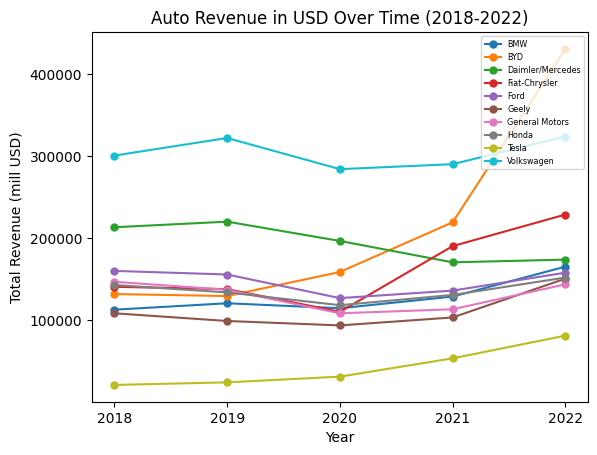

In [13]:

companies = auto.loc[:,'COMPANY NAME'].unique()
years = ['2018','2019', '2020', '2021', '2022']

for co in companies:
    rev = auto[auto['COMPANY NAME'] == co]["REVENUE IN USD"]
    plt.plot(years, rev, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Total Revenue (mill USD)')
plt.title('Auto' +  ' Revenue in USD Over Time (2018-2022)');

In [14]:
emissions = sectors[['SCOPE 1', 'SCOPE 2 (location-based)', 'SCOPE 3', 'TOTAL EMISSIONS']]
# sns.pairplot(emissions)
scope1_BySector['YEAR'].values

array([2018, 2019, 2020, 2021, 2022])

In [15]:
medci_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='Adjusted CI',
    aggfunc = np.median
).round(0).reset_index().drop([0])
medci_BySector

SECTOR,YEAR,Auto,Energy,Food,Tech
1,2018,32.0,400.0,64.0,32.0
2,2019,31.0,434.0,63.0,32.0
3,2020,30.0,601.0,68.0,32.0
4,2021,25.0,307.0,63.0,29.0
5,2022,19.0,197.0,45.0,34.0


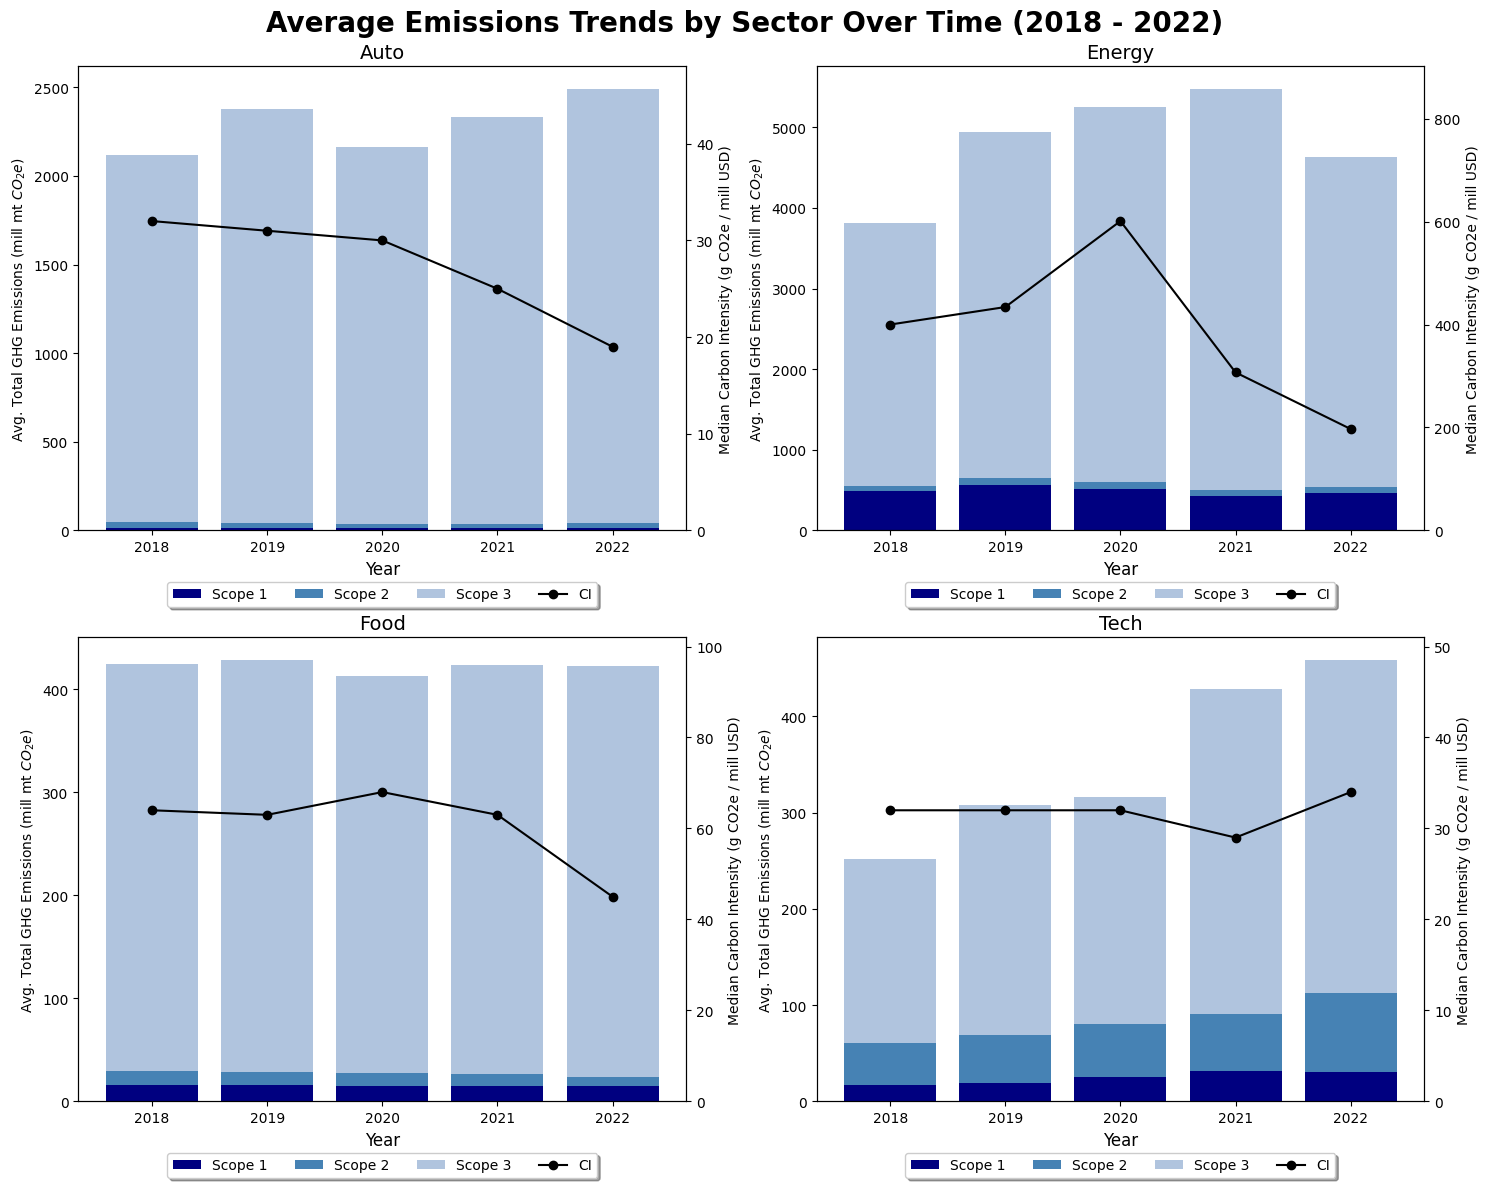

In [16]:
n=0
row = [0, 0, 1, 1]
colu = [0, 1, 0, 1]
fig, ax1 = plt.subplots(2, 2, figsize=[15,12])
for col in avg_BySector.columns[1:]:
    ax1[row[n],colu[n]].bar(scope1_BySector['YEAR'], height=scope1_BySector[col], color='navy', label='Scope 1')
    ax1[row[n],colu[n]].bar(scope2_BySector['YEAR'], height=scope2_BySector[col], bottom=scope1_BySector[col], color='steelblue', label='Scope 2')
    ax1[row[n],colu[n]].bar(scope3_BySector['YEAR'], height=scope3_BySector[col], bottom=scope1_BySector[col]+scope2_BySector[col], color='lightsteelblue', label='Scope 3')

    ax2 = ax1[row[n],colu[n]].twinx()
    ax2.plot(medci_BySector['YEAR'], medci_BySector[col], color = 'black', marker = 'o', label='CI')
    


    ax1[row[n],colu[n]].set_xlabel('Year', fontsize=12)
    ax1[row[n],colu[n]].set_ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    ax2.set_ylabel('Median Carbon Intensity (g CO2e / mill USD)')
    ax2.set_ylim(0, max(medci_BySector[col])*1.5)
    plt.title(col, fontsize=14)
    plt.ylim(0, )
    lines, labels = ax1[row[n],colu[n]].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.18), fancybox=True, shadow=True, ncol=4)
    # plt.legend()
    n+=1

plt.suptitle('Average Emissions Trends by Sector Over Time (2018 - 2022)', fontsize=20, fontweight='bold')
plt.tight_layout()


---

### Scatterplot
Shows the scale of scope 3 in comparison to scope 1 and scope 2 (location-based)

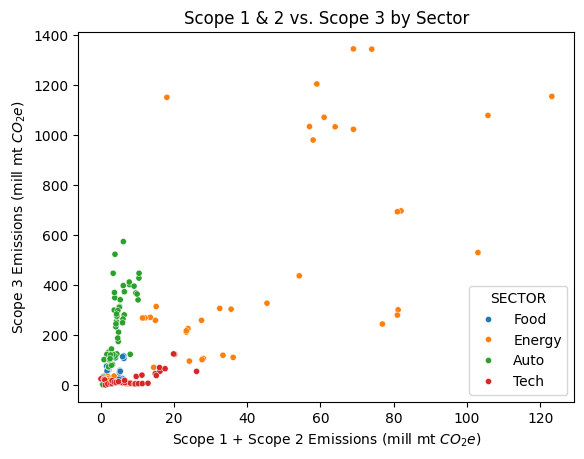

In [17]:
# scatterplot comparing scope 1 + scope 2 vs. scope 3
x = (sectors['SCOPE 1'] + sectors['SCOPE 2 (location-based)']) / 1000000
y = sectors['SCOPE 3']  / 1000000
sns.scatterplot(x=x, y=y, data=sectors, hue='SECTOR', s=20)
plt.xlabel('Scope 1 + Scope 2 Emissions (mill mt $CO_{2}e$)')
plt.ylabel('Scope 3 Emissions (mill mt $CO_{2}e$)')
plt.title('Scope 1 & 2 vs. Scope 3 by Sector')
plt.show();

---

### Plot Showing Scope 3

---

Which Scope is changing the most over time?